# Capstone Project -- Cyber Security
## CalTech Artificial Intelligence & Machine Learning Bootcamp
### Weston Mauz
#### February 5-2023

### Problem Statement

Book-My-Show will enable the ads on their website-but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation-freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

### Dataset Details: 

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

- -1: Phishing

- 0: Suspicious

- 1: Legitimate

The sample could be either legitimate or phishing.

### Exploratory Data Analysis

#### Import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
#pd.options.display.max_rows = None

#### Import Data

In [77]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [7]:
len(df.columns)

32

#### Variables (32)
- 'index'
- 'having_IPhaving_IP_Address'
- 'URLURL_Length'
- 'Shortining_Service'
- 'having_At_Symbol'
- 'double_slash_redirecting'
- 'Prefix_Suffix'
- 'having_Sub_Domain'
- 'SSLfinal_State',
- 'Domain_registeration_length'
- 'Favicon'
- 'port'
- 'HTTPS_token'
- 'Request_URL'
- 'URL_of_Anchor'
- 'Links_in_tags'
- 'SFH'
- 'Submitting_to_email'
- 'Abnormal_URL'
- 'Redirect'
- 'on_mouseover'
- 'RightClick'
- 'popUpWidnow'
- 'Iframe'
- 'age_of_domain'
- 'DNSRecord'
- 'web_traffic'
- 'Page_Rank'
- 'Google_Index'
- 'Links_pointing_to_page'
- 'Statistical_report'
- 'Result'

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

#### Observation

- The data has 32 variables & 11,055 Observations
- All data is numerical of type int64
- There are no missing data points

In [9]:
df.shape

(11055, 32)

In [10]:
a = df.dtypes
category_count = 0
numerical_count = 0
for i in a:
    if i == 'object':
        category_count+=1
    else:
        numerical_count+=1
        
print(f'categorical: {category_count}')
print(f'numerical: {numerical_count}')

categorical: 0
numerical: 32


#### Observation

- All data is numerical
- NO categorical variables

In [12]:
null_sorted = df.isna().sum(axis=0).sort_values(ascending=False)
null_sorted[null_sorted>0]

Series([], dtype: int64)

#### Observation

- No data is null

In [13]:
# Constant features

df.nunique().sort_values(ascending=False)

index                          11055
having_Sub_Domain                  3
Links_pointing_to_page             3
web_traffic                        3
Links_in_tags                      3
URL_of_Anchor                      3
SSLfinal_State                     3
SFH                                3
URLURL_Length                      3
Prefix_Suffix                      2
Domain_registeration_length        2
Statistical_report                 2
Google_Index                       2
Page_Rank                          2
Shortining_Service                 2
DNSRecord                          2
age_of_domain                      2
Iframe                             2
popUpWidnow                        2
RightClick                         2
on_mouseover                       2
Redirect                           2
Abnormal_URL                       2
Submitting_to_email                2
having_IPhaving_IP_Address         2
having_At_Symbol                   2
double_slash_redirecting           2
R

In [15]:
for col in df:
    print(col)
    print(df[col].unique())

index
[    1     2     3 ... 11053 11054 11055]
having_IPhaving_IP_Address
[-1  1]
URLURL_Length
[ 1  0 -1]
Shortining_Service
[ 1 -1]
having_At_Symbol
[ 1 -1]
double_slash_redirecting
[-1  1]
Prefix_Suffix
[-1  1]
having_Sub_Domain
[-1  0  1]
SSLfinal_State
[-1  1  0]
Domain_registeration_length
[-1  1]
Favicon
[ 1 -1]
port
[ 1 -1]
HTTPS_token
[-1  1]
Request_URL
[ 1 -1]
URL_of_Anchor
[-1  0  1]
Links_in_tags
[ 1 -1  0]
SFH
[-1  1  0]
Submitting_to_email
[-1  1]
Abnormal_URL
[-1  1]
Redirect
[0 1]
on_mouseover
[ 1 -1]
RightClick
[ 1 -1]
popUpWidnow
[ 1 -1]
Iframe
[ 1 -1]
age_of_domain
[-1  1]
DNSRecord
[-1  1]
web_traffic
[-1  0  1]
Page_Rank
[-1  1]
Google_Index
[ 1 -1]
Links_pointing_to_page
[ 1  0 -1]
Statistical_report
[-1  1]
Result
[-1  1]


#### Observation

8 Variables have 3 unique values (-1, 0, & 1)

- having_Sub_Domain                  3
- Links_pointing_to_page             3
- web_traffic                        3
- Links_in_tags                      3
- URL_of_Anchor                      3
- SSLfinal_State                     3
- SFH                                3
- URLURL_Length                      3

22 Varaibles have 2 unique values (-1, 1)

- having_IPhaving_IP_Address
- Shortining_Service
- having_At_Symbol
- double_slash_redirecting
- Prefix_Suffix
- Domain_registeration_length
- Favicon
- port
- HTTPS_token
- Request_URL
- Submitting_to_email
- Abnormal_URL
- on_mouseover
- RightClick
- popUpWidnow
- Iframe
- age_of_domain
- DNSRecord
- Page_Rank
- Google_Index
- Statistical_report
- Result

1 Variable have 2 unique values (0, 1)

- Redirect

1 Variable has 11055 unique values (ordinal variable)

- index

In [16]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
df.skew().sort_values(ascending=False)

Redirect                       2.403304
Prefix_Suffix                  2.167975
URLURL_Length                  1.636149
SFH                            1.476049
Page_Rank                      1.105373
Domain_registeration_length    0.715423
Links_in_tags                  0.202672
URL_of_Anchor                  0.113016
index                          0.000000
having_Sub_Domain             -0.118125
age_of_domain                 -0.122725
Links_pointing_to_page        -0.172408
Result                        -0.229293
Request_URL                   -0.380331
SSLfinal_State                -0.515502
web_traffic                   -0.576535
having_IPhaving_IP_Address    -0.661064
DNSRecord                     -0.814466
popUpWidnow                   -1.553519
Favicon                       -1.616655
Submitting_to_email           -1.646990
HTTPS_token                   -1.830363
having_At_Symbol              -1.963891
Abnormal_URL                  -1.990042
Statistical_report            -2.072799


#### Observation

- 8 Variables are positively skewed
- 1 value has a normal distribution (index)
- 23 Variables are negatively skewed
- Most of the data is either positively or negatively skewed -- Most likely will need to be normalized

In [21]:
numerical_correlations = df.corr().abs()

numerical_correlations = numerical_correlations.unstack()
numerical_correlations_sorted = numerical_correlations.sort_values(ascending=False)
numerical_correlations_sorted[(numerical_correlations_sorted<1) & (numerical_correlations_sorted>0.6)]

Favicon                      popUpWidnow                    0.939633
popUpWidnow                  Favicon                        0.939633
Shortining_Service           double_slash_redirecting       0.842796
double_slash_redirecting     Shortining_Service             0.842796
port                         Favicon                        0.803834
Favicon                      port                           0.803834
port                         Submitting_to_email            0.799088
Submitting_to_email          port                           0.799088
double_slash_redirecting     HTTPS_token                    0.760799
HTTPS_token                  double_slash_redirecting       0.760799
                             Shortining_Service             0.757838
Shortining_Service           HTTPS_token                    0.757838
port                         popUpWidnow                    0.748517
popUpWidnow                  port                           0.748517
Abnormal_URL                 Short

#### Observation

- Many of the variables have high correlation to each other (>0.7)

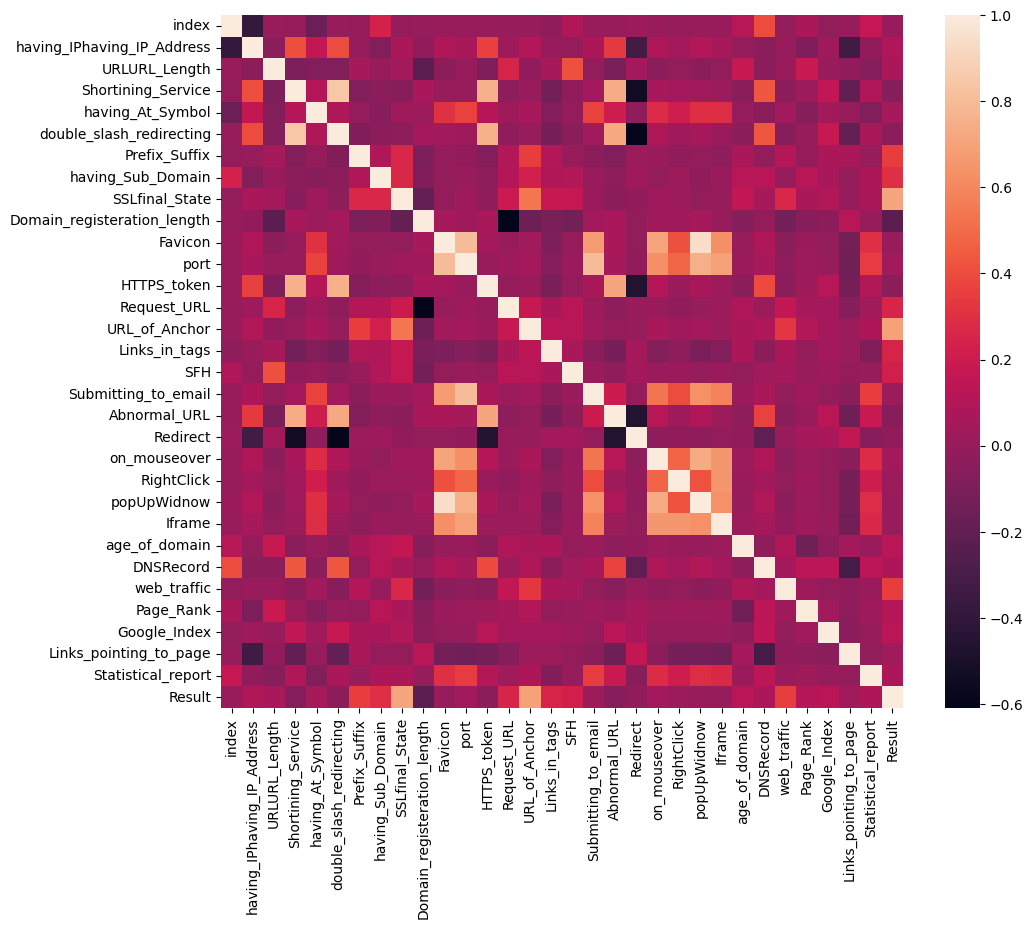

In [24]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr())
plt.show()

#### Observation

- The above heatmap shows the correlations between the variables of the dataset

In [ ]:
#### Notes

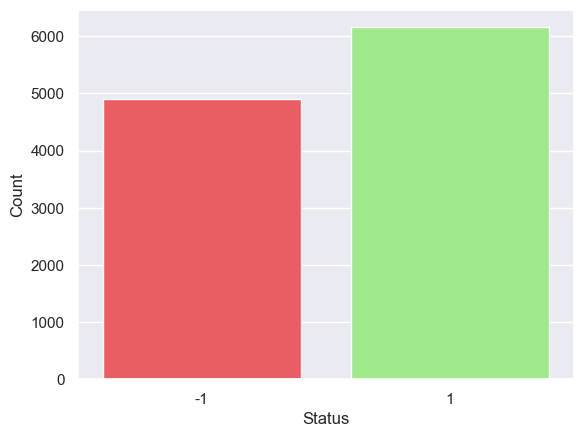

In [67]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Result", data=df, palette=sns.xkcd_palette(["light red", "light green"]))
plt.xlabel('Status')
plt.ylabel('Count')
# plt.savefig('./plots/status_count.png')
plt.show()

#### Observation

Out of the total 11,055 observations:

- ~6000 are legitimate websites
- ~5000 are phishing websites

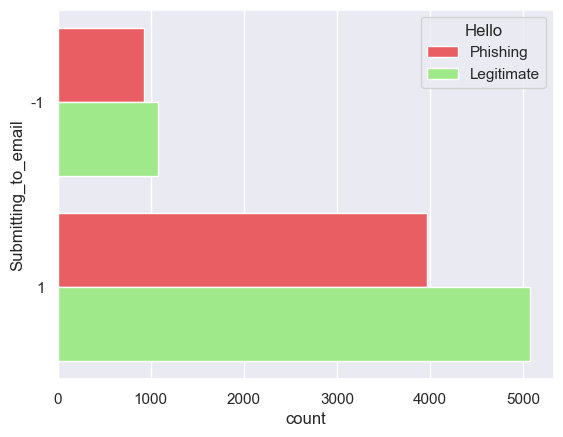

In [66]:
sns.countplot(data=df, y="Submitting_to_email", hue="Result", palette=sns.xkcd_palette(["light red", "light green"]))
plt.legend(title="Hello", labels=["Phishing", "Legitimate"])

### Feature Engineering

### Note

Using Feature Engine's Smart Correlated Selection, the features will be evaluated for correlation. The features that this finds will be dropped.

The correlated features will be decided by the following attributes:

- pearson correlation (linear)
- threshold: 0.8
- selection mode: variance (keeps feature with highest variance)

The remaining dataframe will be called 

In [78]:
from feature_engine.selection import SmartCorrelatedSelection

selector = SmartCorrelatedSelection(method='pearson', threshold=0.8, selection_method= 'variance', estimator=None)

df = selector.fit_transform(df)

In [79]:
selector.correlated_feature_sets_

[{'Shortining_Service', 'double_slash_redirecting'},
 {'Favicon', 'popUpWidnow', 'port'}]

In [80]:
selector.features_to_drop_

['double_slash_redirecting', 'Favicon', 'port']

In [81]:
df.drop('index',1, inplace=True)

In [82]:
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,Request_URL,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,-1,0,1,-1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,-1,-1,-1,1,-1,-1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,-1,1,1,-1,1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [83]:
len(df.columns)

28

#### Note

The Features dropped in include:

- 'double_slash_redirecting' 
- 'Favicon'
- 'port'

The Feature manually dropped:

- 'index'

In [84]:
# Split in train and validation

from sklearn.model_selection import train_test_split

y = df['Result']
X = df.drop(columns=['Result'])

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.33, random_state=42)

#### Observation

- These plots show how many websites are real/fake given a certain variable
- This will be explored later after the model has been built

#### Note

- Winsorizer will be skipped because there will be no outliers in a binary dataset

In [85]:
X_train.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,Request_URL,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
10498,1,-1,1,1,-1,-1,-1,-1,1,-1,...,1,1,1,1,1,0,-1,1,0,1
8673,-1,-1,1,1,-1,0,1,1,1,1,...,1,1,1,1,1,1,-1,1,1,1
3429,1,-1,1,1,-1,-1,-1,-1,1,-1,...,1,1,1,-1,-1,0,-1,1,0,1
821,1,-1,1,1,1,-1,1,-1,1,1,...,1,1,1,1,1,1,-1,1,1,1
2063,1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,1,-1,1,1,1,1,0,1


In [86]:
# Variance Stabilizing Transformations

from feature_engine.transformation import YeoJohnsonTransformer

yeo_trans = YeoJohnsonTransformer()
yeo_trans.fit(X_train)

X_train = yeo_trans.transform(X_train)
#X_val = yeo_trans.transform(X_val)

In [87]:
X_train.skew().sort_values(ascending=False)

Redirect                       2.421812
Prefix_Suffix                  2.170612
URLURL_Length                  1.571546
SFH                            1.245394
Page_Rank                      1.082221
Domain_registeration_length    0.700600
Links_in_tags                  0.084184
URL_of_Anchor                  0.040629
having_Sub_Domain             -0.056551
Links_pointing_to_page        -0.128121
age_of_domain                 -0.132643
web_traffic                   -0.335268
Request_URL                   -0.356110
SSLfinal_State                -0.389965
having_IPhaving_IP_Address    -0.663014
DNSRecord                     -0.832657
popUpWidnow                   -1.566431
Submitting_to_email           -1.656792
HTTPS_token                   -1.845614
having_At_Symbol              -1.968077
Abnormal_URL                  -2.008964
Google_Index                  -2.080024
Statistical_report            -2.081647
Shortining_Service            -2.205784
on_mouseover                  -2.354490


In [88]:
X_train

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,Request_URL,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
10498,1.657198,-4.084268,9.261818,6.496613,-8.761211,-0.947773,-0.746294,-1.709446,5.508035,-0.782448,...,4615.235042,3.923805,30.696697,1.100184,1.911303,0.000000,-2.389625,7.631666,0.000000,7.650082
8673,-0.640148,-4.084268,9.261818,6.496613,-8.761211,0.000000,1.372922,0.624950,5.508035,1.299764,...,4615.235042,3.923805,30.696697,1.100184,1.911303,1.359730,-2.389625,7.631666,1.022395,7.650082
3429,1.657198,-4.084268,9.261818,6.496613,-8.761211,-0.947773,-0.746294,-1.709446,5.508035,-0.782448,...,4615.235042,3.923805,30.696697,-0.911059,-0.574815,0.000000,-2.389625,7.631666,0.000000,7.650082
821,1.657198,-4.084268,9.261818,6.496613,0.251557,-0.947773,1.372922,-1.709446,5.508035,1.299764,...,4615.235042,3.923805,30.696697,1.100184,1.911303,1.359730,-2.389625,7.631666,1.022395,7.650082
2063,1.657198,-4.084268,9.261818,6.496613,-8.761211,-0.947773,1.372922,-1.709446,5.508035,1.299764,...,4615.235042,3.923805,30.696697,-0.911059,1.911303,1.359730,0.492132,7.631666,0.000000,7.650082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-0.640148,-0.000000,9.261818,6.496613,-8.761211,0.000000,-0.746294,0.624950,-0.308146,-0.782448,...,4615.235042,3.923805,30.696697,-0.911059,1.911303,1.359730,0.492132,7.631666,-0.978221,7.650082
5191,1.657198,0.358087,9.261818,-0.285587,-8.761211,1.055912,-0.746294,0.624950,5.508035,-0.782448,...,4615.235042,3.923805,-0.165765,-0.911059,1.911303,-0.752476,0.492132,7.631666,0.000000,7.650082
5390,-0.640148,0.358087,9.261818,-0.285587,-8.761211,0.000000,-0.746294,0.624950,5.508035,1.299764,...,4615.235042,3.923805,-0.165765,1.100184,1.911303,0.000000,0.492132,7.631666,0.000000,7.650082
860,1.657198,-4.084268,9.261818,6.496613,-8.761211,1.055912,1.372922,0.624950,5.508035,-0.782448,...,4615.235042,-0.365859,-0.165765,1.100184,1.911303,-0.752476,-2.389625,7.631666,0.000000,-0.266021


In [90]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler

#### Note

Data is now being scaled 

In [92]:
# Data Scaling

# set up the wrapper with the SimpleImputer
scaler = SklearnTransformerWrapper(transformer = StandardScaler())
scaler.fit(X_train)

X_train = scaler.transform(X_train)

In [94]:
X_train

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,HTTPS_token,Request_URL,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
10498,0.722055,-0.486296,0.385914,0.418994,-0.390519,-1.277456,-1.304202,-0.709328,0.437978,-1.193740,...,0.215955,0.487053,0.317705,0.935888,0.666927,-0.588172,-0.595961,0.402831,-0.612154,0.402604
8673,-1.384935,-0.486296,0.385914,0.418994,-0.390519,-0.124033,0.853039,1.409785,0.437978,0.837703,...,0.215955,0.487053,0.317705,0.935888,0.666927,0.911055,-0.595961,0.402831,1.156755,0.402604
3429,0.722055,-0.486296,0.385914,0.418994,-0.390519,-1.277456,-1.304202,-0.709328,0.437978,-1.193740,...,0.215955,0.487053,0.317705,-1.068504,-1.499415,-0.588172,-0.595961,0.402831,-0.612154,0.402604
821,0.722055,-0.486296,0.385914,0.418994,2.560692,-1.277456,0.853039,-0.709328,0.437978,0.837703,...,0.215955,0.487053,0.317705,0.935888,0.666927,0.911055,-0.595961,0.402831,1.156755,0.402604
2063,0.722055,-0.486296,0.385914,0.418994,-0.390519,-1.277456,0.853039,-0.709328,0.437978,0.837703,...,0.215955,0.487053,0.317705,-1.068504,0.666927,0.911055,1.677963,0.402831,-0.612154,0.402604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-1.384935,1.862766,0.385914,0.418994,-0.390519,-0.124033,-1.304202,1.409785,-2.283219,-1.193740,...,0.215955,0.487053,0.317705,-1.068504,0.666927,0.911055,1.677963,0.402831,-2.304634,0.402604
5191,0.722055,2.068719,0.385914,-2.386672,-0.390519,1.160994,-1.304202,1.409785,0.437978,-1.193740,...,0.215955,0.487053,-3.147573,-1.068504,0.666927,-1.417847,1.677963,0.402831,-0.612154,0.402604
5390,-1.384935,2.068719,0.385914,-2.386672,-0.390519,-0.124033,-1.304202,1.409785,0.437978,0.837703,...,0.215955,0.487053,-3.147573,0.935888,0.666927,-0.588172,1.677963,0.402831,-0.612154,0.402604
860,0.722055,-0.486296,0.385914,0.418994,-0.390519,1.160994,0.853039,1.409785,0.437978,-1.193740,...,0.215955,-2.053167,-3.147573,0.935888,0.666927,-1.417847,-0.595961,0.402831,-0.612154,-2.483830


<AxesSubplot: >

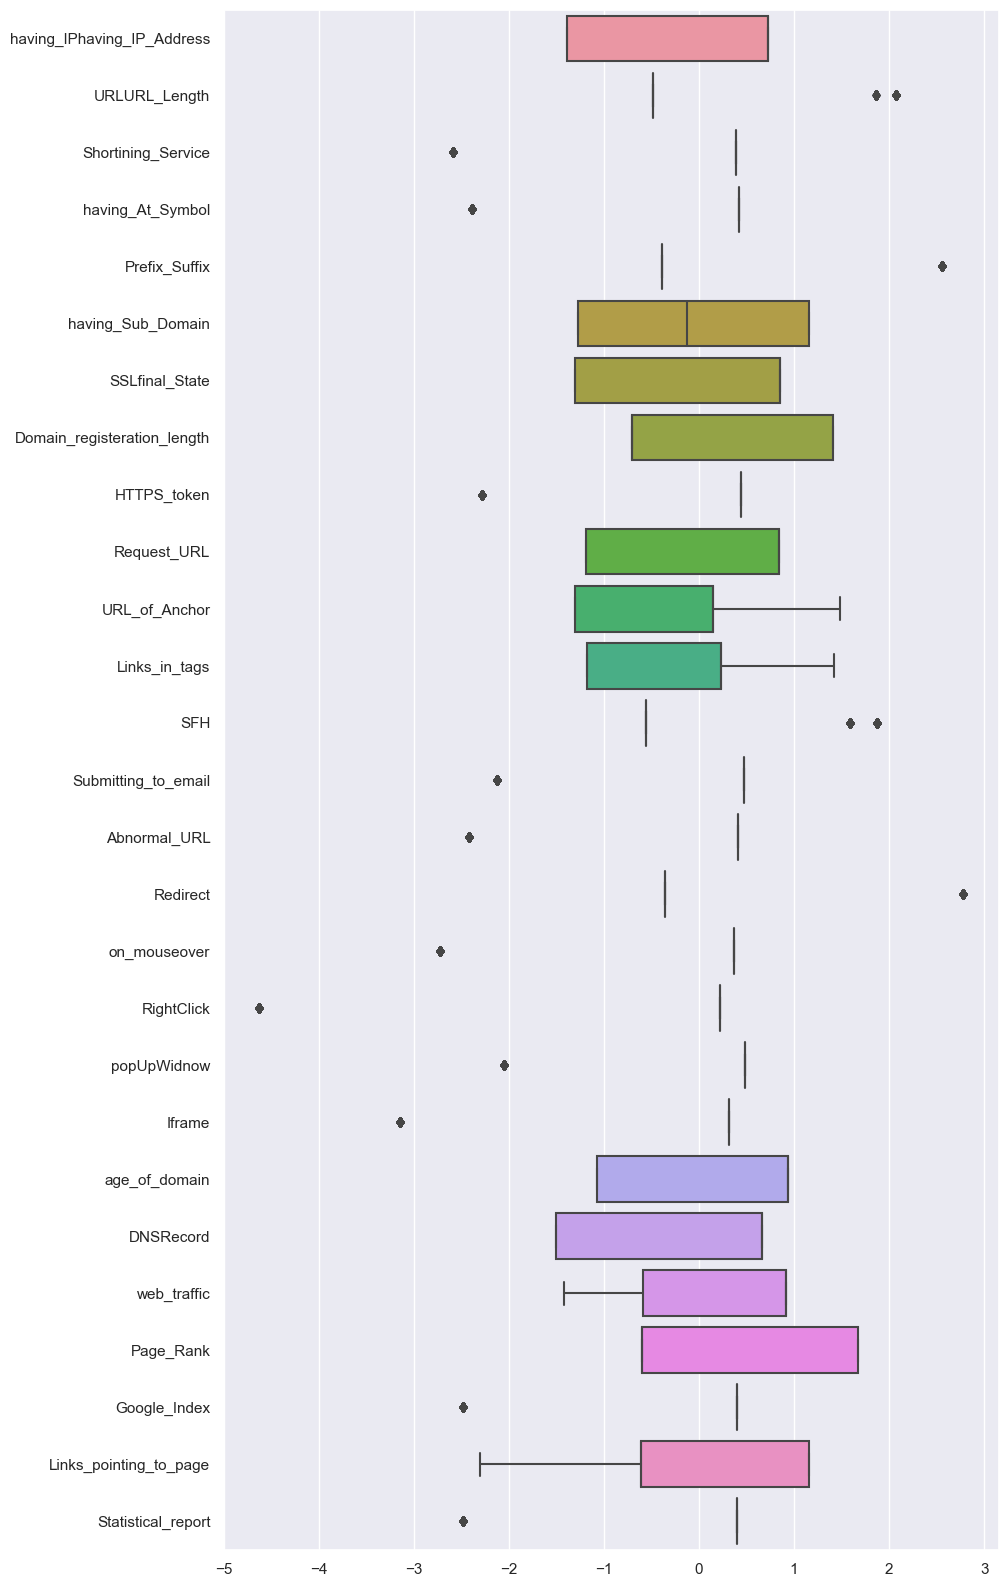

In [95]:
plt.figure(figsize=(10,20))
sns.boxplot(data=X_train, orient="h")

#### Observation

- All variables how now had their variance stabilized & their value scaled 

### Building the Model

In [96]:
#### Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [98]:
predictions = rfc.predict(X_val)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

          -1       0.95      0.94      0.94      1565
           1       0.95      0.96      0.96      2084

    accuracy                           0.95      3649
   macro avg       0.95      0.95      0.95      3649
weighted avg       0.95      0.95      0.95      3649



In [100]:
print(confusion_matrix(y_val,predictions))

[[1469   96]
 [  79 2005]]


#### ROC Score & Curve

In [101]:
from sklearn.metrics import RocCurveDisplay

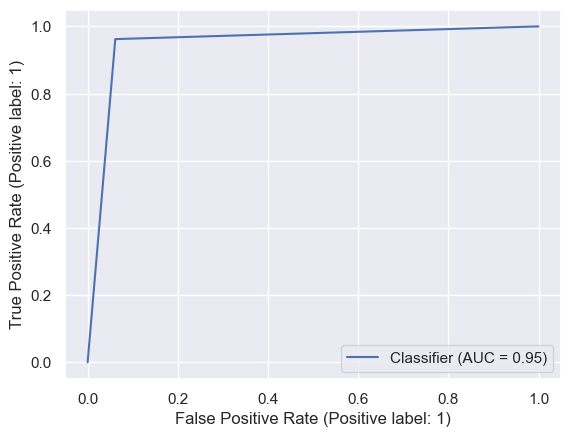

In [102]:
RocCurveDisplay.from_predictions(y_val,predictions)

#### Note

- ROC Score of 0.95
- Indicates a model that performs well with minimal false positives

### Note

- Now the model will be evaluated with cross validation & k-folds

- The cross validation will use 5 k-folds

In [104]:
from sklearn.model_selection import cross_val_score

In [108]:
scores = cross_val_score(rfc, X_val, y_val, cv=5)

In [107]:
scores

array([0.95890411, 0.9630137 , 0.94931507, 0.95342466, 0.9478738 ])

### Note

Cross-validation Score:

- 0.95 accuracy with a standard deviation of 0.00

### Model Complete